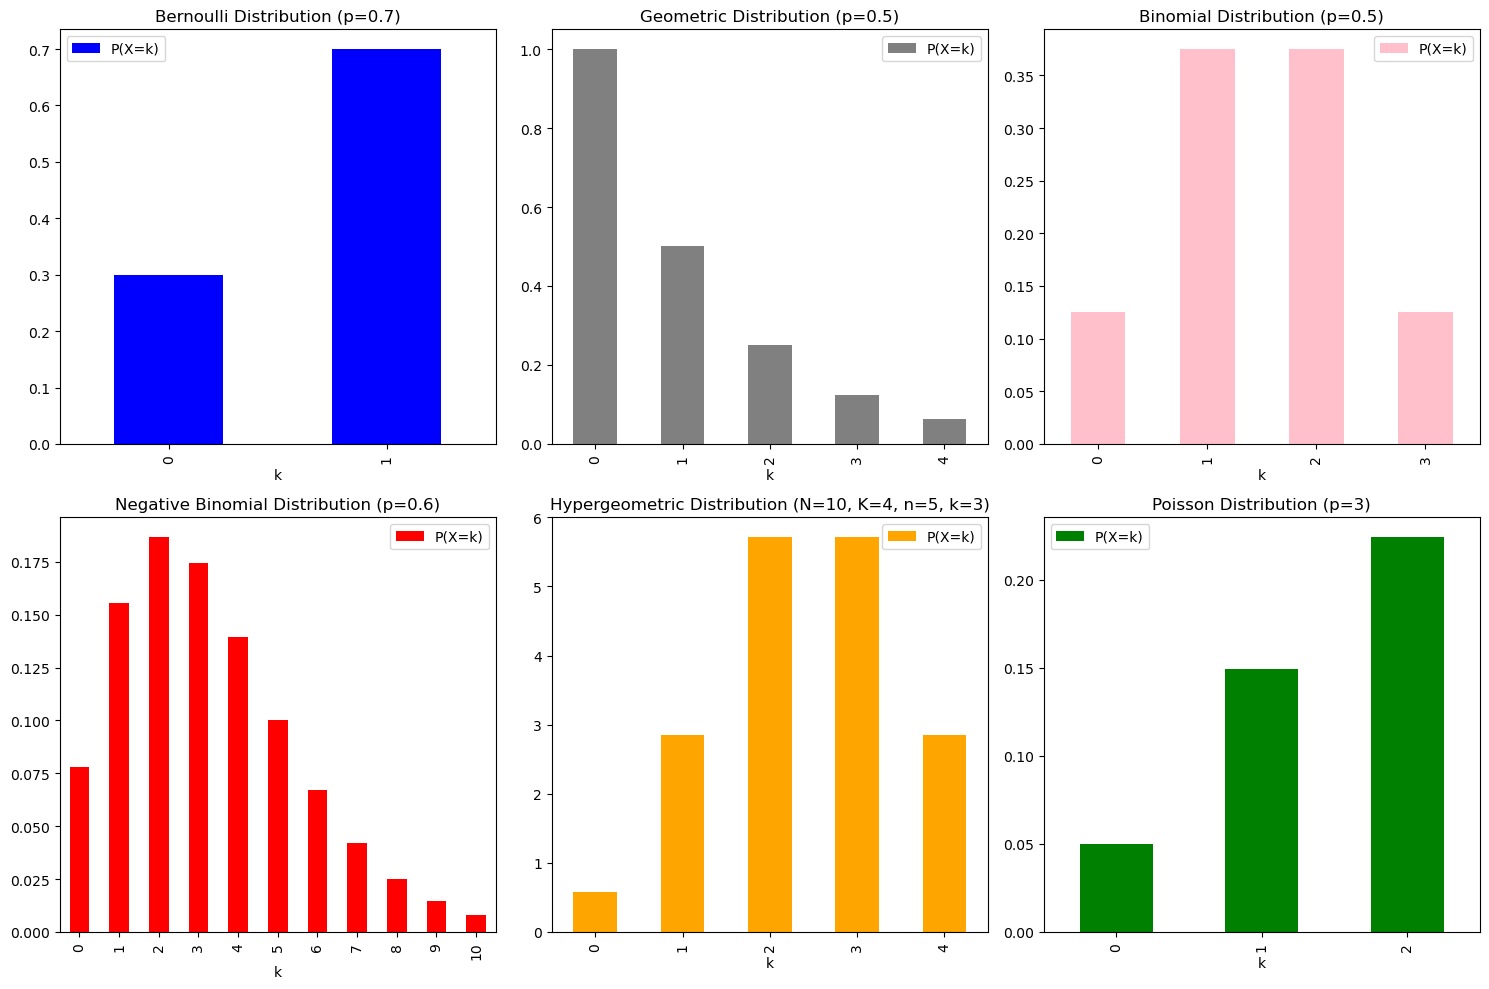

In [3]:
import pandas as pd
import math
import matplotlib.pyplot as plt

class ProbabilityDistributions:
    def __init__(self):
        pass

    def factorial(self, num):
        result = 1
        for i in range(1, num + 1):
            result *= i
        return result

    def bernoulli_probability(self, p, x):
        if x == 1:
            return p
        elif x == 0:
            return 1 - p
        else:
            return 0

    def bernoulli_distribution(self, p):
        probabilities = [self.bernoulli_probability(p, 0), self.bernoulli_probability(p, 1)]
        data = {'k': [0, 1], 'P(X=k)': probabilities}
        df = pd.DataFrame(data)
        return df

    def geometric_probability(self, p, k):
        return ((1 - p) ** (k - 1)) * p

    def geometric_distribution(self, p, k):
        probabilities = [self.geometric_probability(p, i) for i in range(k)]
        data = {'k': range(k), 'P(X=k)': probabilities}
        df = pd.DataFrame(data)
        return df

    def binomial_probability(self, p, n, k):
        result = (self.factorial(n) / (self.factorial(k) * self.factorial(n - k))) * (p ** k) * ((1 - p) ** (n - k))
        return result

    def binomial_distribution(self, p, n):
        probabilities = [self.binomial_probability(p, n, i) for i in range(n + 1)]
        data = {'k': range(n + 1), 'P(X=k)': probabilities}
        df = pd.DataFrame(data)
        return df

    def negative_binomial_probability(self, p, r, k):
        return (self.factorial(k + r - 1) / (self.factorial(k) * self.factorial(r - 1))) * (p ** r) * ((1 - p) ** k)

    def negative_binomial_distribution(self, p, r, k):
        probabilities = [self.negative_binomial_probability(p, r, i) for i in range(k + 1)]
        data = {'k': range(k + 1), 'P(X=k)': probabilities}
        df = pd.DataFrame(data)
        return df

    def hypergeometric_probability(self, N, K, n, k):
        return (self.factorial(K) * self.factorial(N - K) * self.factorial(n) * self.factorial(N - n)) / (self.factorial(n - k) * self.factorial(k) * self.factorial(N))

    def hypergeometric_distribution(self, N, K, n):
        max_k = min(n, K)
        probabilities = [self.hypergeometric_probability(N, K, n, i) for i in range(max_k + 1)]
        data = {'k': range(max_k + 1), 'P(X=k)': probabilities}
        df = pd.DataFrame(data)
        return df

    def poisson_probability(self, p, k):
        return ((math.e ** -p) * (p ** k)) / self.factorial(k)

    def poisson_distribution(self, p, k):
        probabilities = [self.poisson_probability(p, i) for i in range(k + 1)]
        data = {'k': range(k + 1), 'P(X=k)': probabilities}
        df = pd.DataFrame(data)
        return df  

    def plot_distributions(self, p_bernoulli, p_geometric, p_binomial, p_negative_binomial, p_hypergeometric, p_poisson):
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))

        df = self.bernoulli_distribution(p_bernoulli)
        df.plot(kind='bar', x='k', y='P(X=k)', ax=axes[0, 0], title=f'Bernoulli Distribution (p={p_bernoulli})', color="blue")

        df = self.geometric_distribution(p_geometric, 5)
        df.plot(kind='bar', x='k', y='P(X=k)', ax=axes[0, 1], title=f'Geometric Distribution (p={p_geometric})', color="grey")

        df = self.binomial_distribution(p_binomial, 3)
        df.plot(kind='bar', x='k', y='P(X=k)', ax=axes[0, 2], title=f'Binomial Distribution (p={p_binomial})', color="pink")

        df = self.negative_binomial_distribution(p_negative_binomial, 5, 10)
        df.plot(kind='bar', x='k', y='P(X=k)', ax=axes[1, 0], title=f'Negative Binomial Distribution (p={p_negative_binomial})', color="red")

        N, K, n, k = 10, 4, 5, 3
        df = self.hypergeometric_distribution(N, K, n)
        df.plot(kind='bar', x='k', y='P(X=k)', ax=axes[1, 1], title=f'Hypergeometric Distribution (N={N}, K={K}, n={n}, k={k})', color="orange")

        df = self.poisson_distribution(p_poisson, 2)
        df.plot(kind='bar', x='k', y='P(X=k)', ax=axes[1, 2], title=f'Poisson Distribution (p={p_poisson})', color="green")

        plt.tight_layout()
        plt.show()


p_bernoulli = 0.7
p_geometric = 0.5
p_binomial = 0.5
p_negative_binomial = 0.6
p_hypergeometric = 0.4
p_poisson = 3

x = ProbabilityDistributions()
x.plot_distributions(p_bernoulli, p_geometric, p_binomial, p_negative_binomial, p_hypergeometric, p_poisson)


## Bernoulli_distribution
In a basketball game, a player attempts a free throw. Define a Bernoulli random variable X to represent whether the player makes the free throw or not. What is the probability that the player makes the free throw, given that their success rate is p=0.7

In [4]:
#p=0.7
a=x.bernoulli_distribution(0.7)
a.transpose()


,0,1
k,0.0,1.0
P(X=k),0.3,0.7


## Geometric_distribution
What is the probability of flipping a fair coin exactly 5 times until obtaining heads for the first time?

In [9]:
#p=0.5,k=5
g=x.geometric_distribution(0.5,5)
g.transpose() 

,0,1,2,3,4
k,0.0,1.0,2.00,3.000,4.0000
P(X=k),1.0,0.5,0.25,0.125,0.0625


## Binomial_distribution
What is the probability of getting exactly 3 heads in 5 fair coin flips?

In [10]:
#k=3,p=0.5
b=x.binomial_distribution(0.5,3)
b.transpose()

,0,1,2,3
k,0.000,1.000,2.000,3.000
P(X=k),0.125,0.375,0.375,0.125


## Negative binomial_distribution
What is the probability of observing the 5th success on the 10th trial, given the probability of success (p) is 0.6, in a negative binomial distribution?

In [12]:
#k=5,p=0.6,r=10
n=x.negative_binomial_distribution(0.6,5,10)
n.transpose()

,0,1,2,3,4,5,6,7,8,9,10
k,0.00000,1.00000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
P(X=k),0.07776,0.15552,0.186624,0.174182,0.139346,0.100329,0.066886,0.042043,0.025226,0.014575,0.008162


## Hypergeometric_distribution
What is the probability of drawing exactly 3 red balls out of 5 draws from a box containing 10 balls, of which 4 are red and 6 are blue, without replacement?

In [13]:
#N=10,K=4,n=5,k=3
h=x.hypergeometric_distribution(10,4,5)
h.transpose()

,0,1,2,3,4
k,0.000000,1.000000,2.000000,3.000000,4.000000
P(X=k),0.571429,2.857143,5.714286,5.714286,2.857143


## Poisson_distribution
What is the probability of observing exactly 2 events in a given time period, if events occur on average 3 times per hour according to a Poisson process?

In [18]:
#lambda=3,k=2
p=x.poisson_distribution(3,2)
p.transpose()

,0,1,2
k,0.000000,1.000000,2.000000
P(X=k),0.049787,0.149361,0.224042
